<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>Deep Learning From Scratch</h1>
        <h2>Simple Network</h2>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

matplotlib 3.1.0
numpy      1.16.2
pandas     0.24.2
watermark  1.8.1
seaborn    0.9.0
Sun Dec 01 2019 2019-12-01T23:20:42-04:00

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.0.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 1aa3ac8e019f5a80d5859a063dba4cefad42fbaf


In [3]:
plt.style.use('./d4sci.mplstyle')

# Load Dataset

In [4]:
X_train = np.load('input/X_train.npy')
X_test = np.load('input/X_test.npy')
y_train = np.load('input/y_train.npy')
y_test = np.load('input/y_test.npy')

Preprocessing

In [5]:
input_layer_size = X_train.shape[1]

X_train /= 255.
X_test /= 255.

In [6]:
X_train.shape

(5000, 784)

In [7]:
X_test.shape

(1000, 784)

## Initialize weights

We define the initializatino function as we'll have to call it more than once

In [8]:
def init_weights(L_in, L_out):
    epsilon = 0.12

    return 2*np.random.rand(L_out, L_in+1)*epsilon - epsilon

Set the layer sizes we'll be using

In [9]:
hidden_layer_size = 50
num_labels = 10

Initialize the weights

In [10]:
Theta1 = init_weights(input_layer_size, hidden_layer_size)
Theta2 = init_weights(hidden_layer_size, num_labels)

## Utility functions

One-hot encoding to define the labels

In [11]:
def one_hot(K, pos):
    y0 = np.zeros(K)
    y0[pos] = 1

    return y0

In [12]:
one_hot(10, 2)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

Activation function, just as before

In [13]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

## Forward Propagation and Prediction

Same functions defined above

In [14]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Back propagation

In [15]:
def backprop(Theta1, Theta2, X, y):
    N = X.shape[0]
    K = Theta2.shape[0]

    J = 0

    Delta2 = np.zeros(Theta2.shape)
    Delta1 = np.zeros(Theta1.shape)

    for i in range(N):
        # Forward propagation, saving intermediate results
        a1 = np.concatenate(([1], X[i]))  # Input layer

        z2 = np.dot(Theta1, a1)
        a2 = np.concatenate(([1], sigmoid(z2)))  # Hidden Layer

        z3 = np.dot(Theta2, a2)
        a3 = sigmoid(z3)  # Output layer

        y0 = one_hot(K, y[i])

        # Cross entropy
        J -= np.dot(y0.T, np.log(a3))+np.dot((1-y0).T, np.log(1-a3))

        # Calculate the weight deltas
        delta_3 = a3-y0
        delta_2 = np.dot(Theta2.T, delta_3)[1:]*sigmoidGradient(z2)

        Delta2 += np.outer(delta_3, a2)
        Delta1 += np.outer(delta_2, a1)

    J /= N

    Theta1_grad = Delta1/N
    Theta2_grad = Delta2/N

    return [J, Theta1_grad, Theta2_grad]

## Training procedure
The basic idea is the same as for the linear and logistic regression cases

In [16]:
step = 0
tol = 1e-3
J_old = 1/tol
diff = 1

acc_train = []
acc_test = []
J_val = []
steps = []

while diff > tol:
    J_train, Theta1_grad, Theta2_grad = backprop(Theta1, Theta2, X_train, y_train)

    diff = abs(J_old-J_train)
    J_old = J_train
    J_val.append(J_train)
    
    step += 1

    if step % 10 == 0:
        pred_train = predict(Theta1, Theta2, X_train)
        pred_test = predict(Theta1, Theta2, X_test)

        J_test, T1_grad, T2_grad = backprop(Theta1, Theta2, X_test, y_test)
        
        acc_train.append(accuracy(pred_train, y_train))
        acc_test.append(accuracy(pred_test, y_test))
        steps.append(step)
        
        print(step, J_train, J_test, acc_train[-1], acc_test[-1])

    Theta1 -= .5*Theta1_grad
    Theta2 -= .5*Theta2_grad

10 3.11166959006285 3.1208393126648715 44.379999999999995 41.8
20 2.884931585478909 2.9137510782080662 59.019999999999996 54.6
30 2.5636967361397938 2.617994976095144 63.339999999999996 58.4
40 2.2453994341255687 2.3212101305385517 67.54 64.0
50 1.9928282766943979 2.083235262499036 71.98 69.1
60 1.7996608540141685 1.8999272211955405 75.38 72.39999999999999
70 1.6465129050147254 1.7539055237356551 78.3 74.5
80 1.5204727368817355 1.6334026925580745 80.28 76.1
90 1.4143299294662197 1.5318781618581458 82.08 78.0
100 1.3237482246532688 1.445404105567321 83.64 79.7
110 1.2457193406477254 1.3712047649391295 84.82 81.3
120 1.1779420466684611 1.3070918932611393 85.86 81.8
130 1.1185934727590943 1.2512834095865186 86.74 83.5
140 1.0662256033477766 1.2023360974524222 87.3 84.0
150 1.0196928928783506 1.15909672168802 87.83999999999999 85.1
160 0.9780891707696127 1.1206512767711765 88.3 85.5
170 0.9406930059703993 1.0862748760745975 88.75999999999999 86.2
180 0.9069231914000844 1.0553874599678614 8

## Accuracy during training

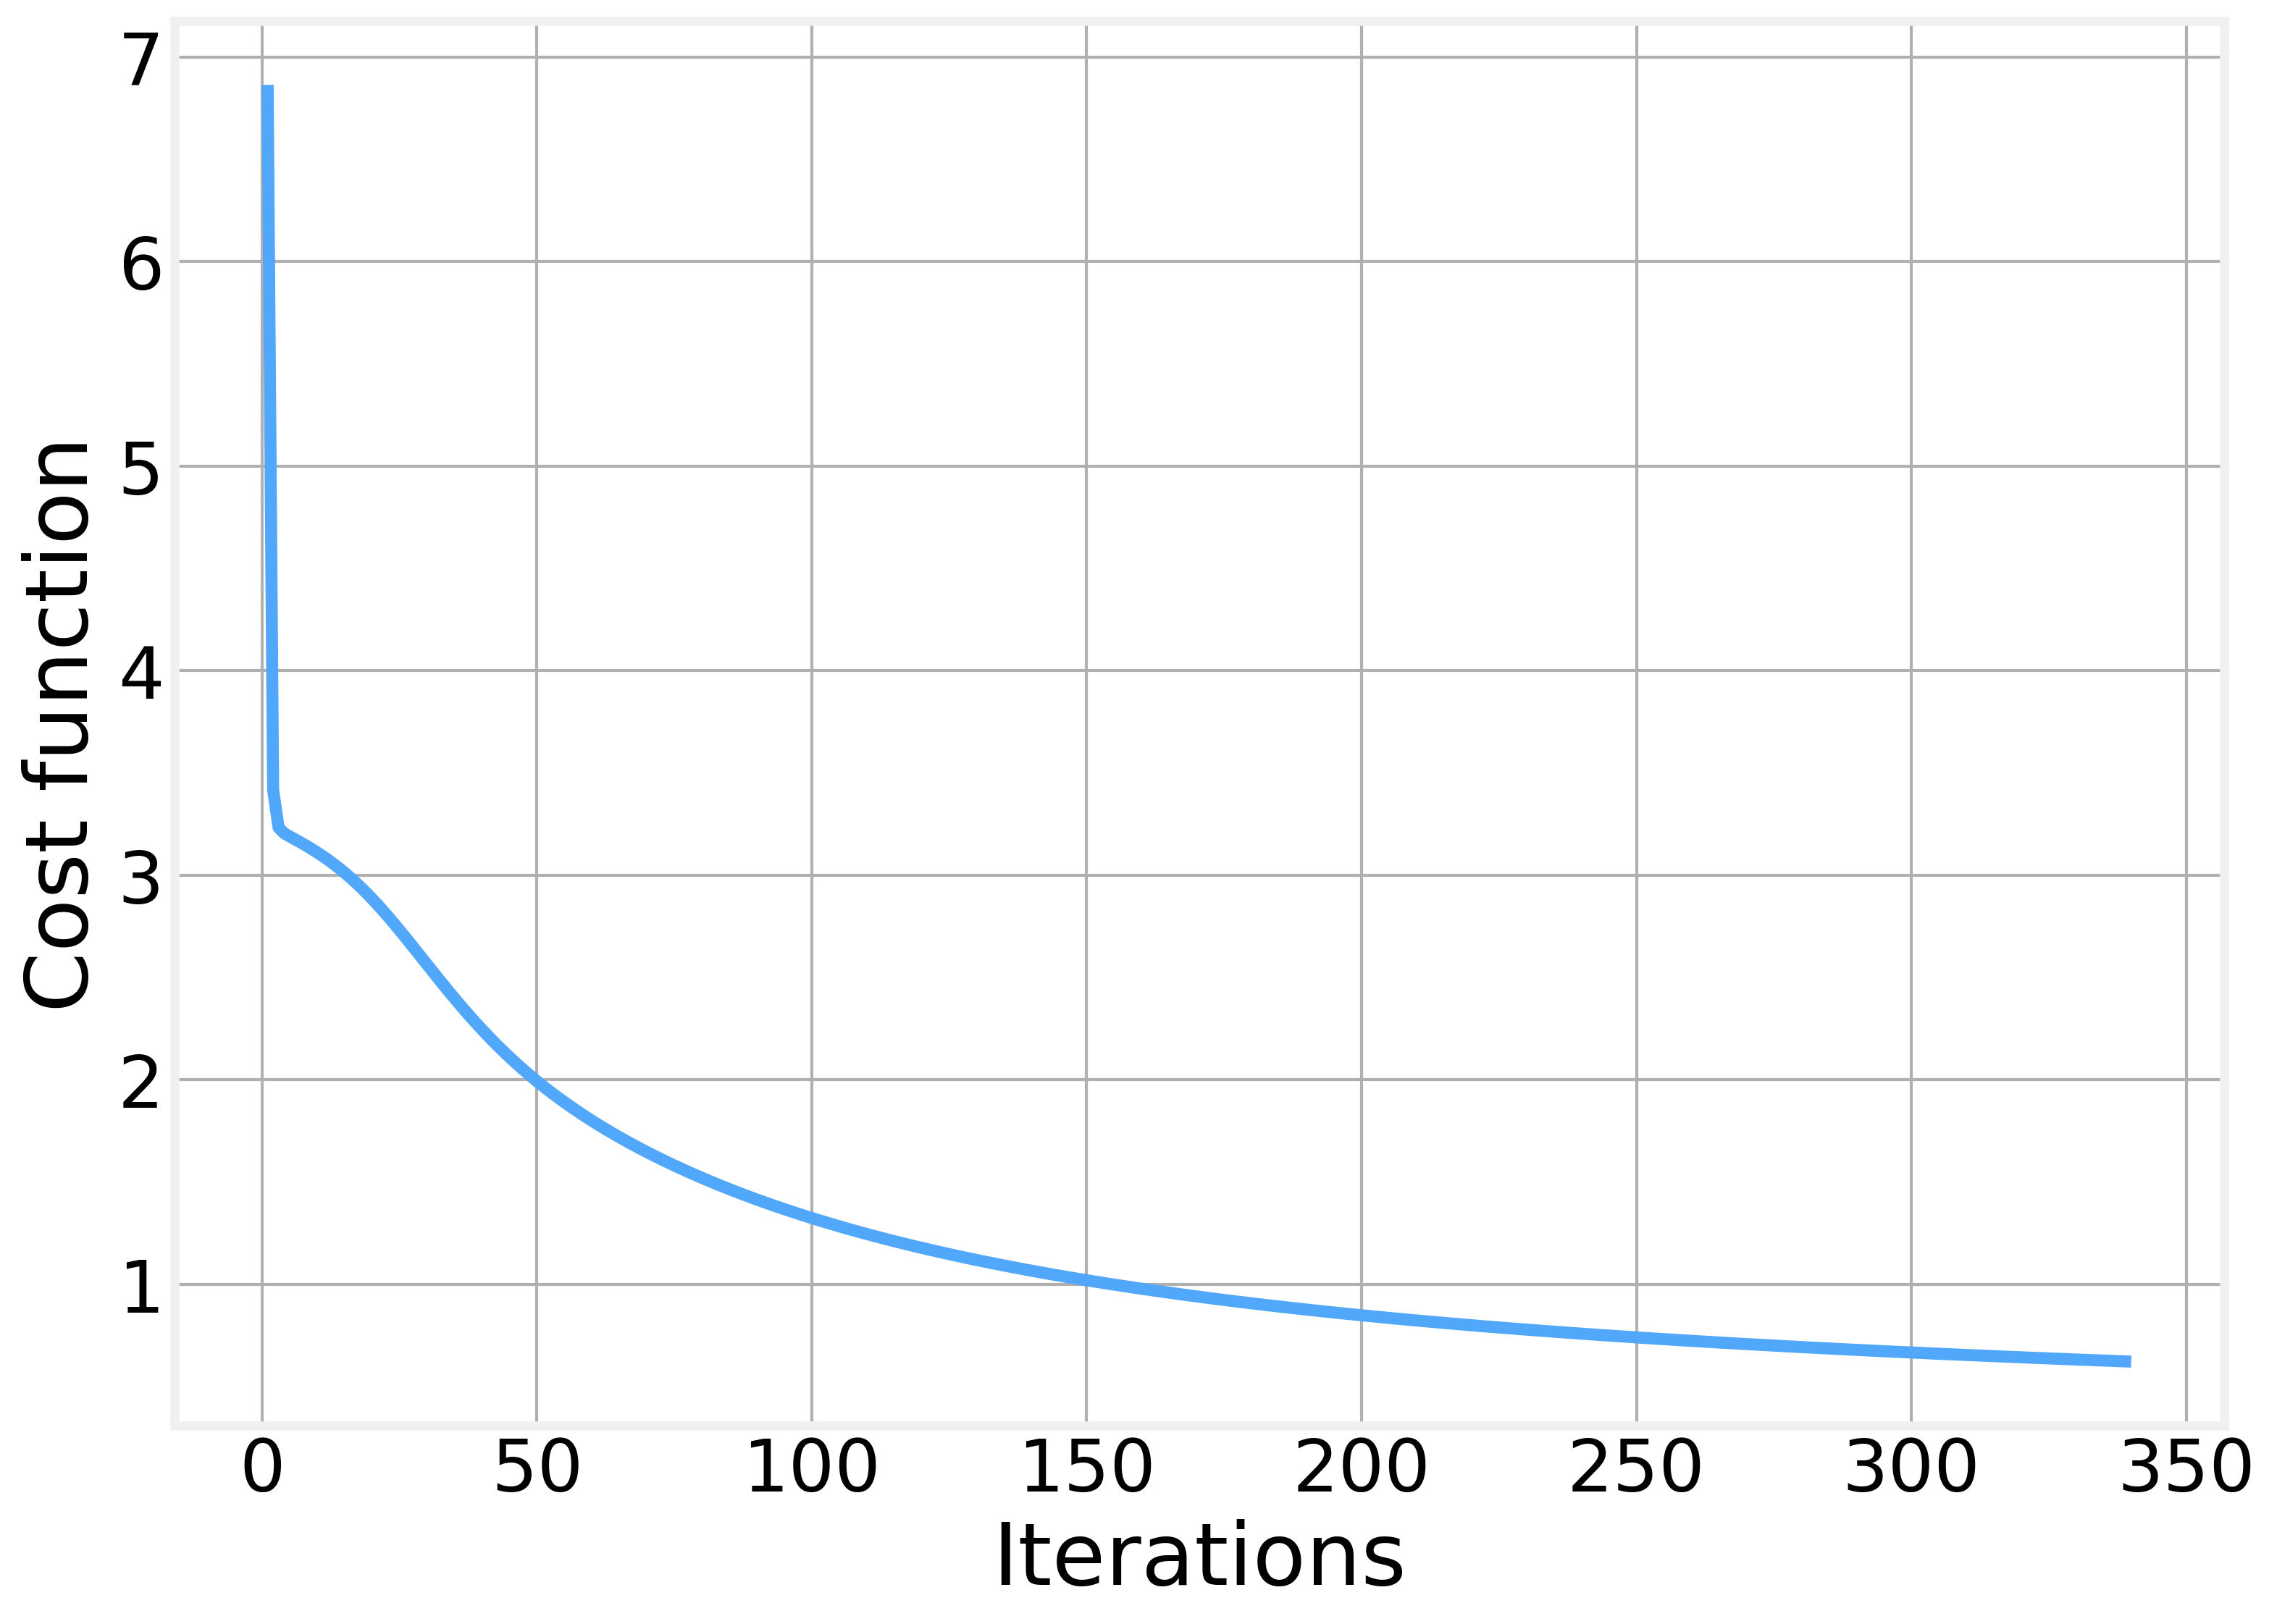

In [17]:
plt.plot(np.arange(1, len(J_val)+1), J_val)
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.gcf().set_size_inches(11, 8)

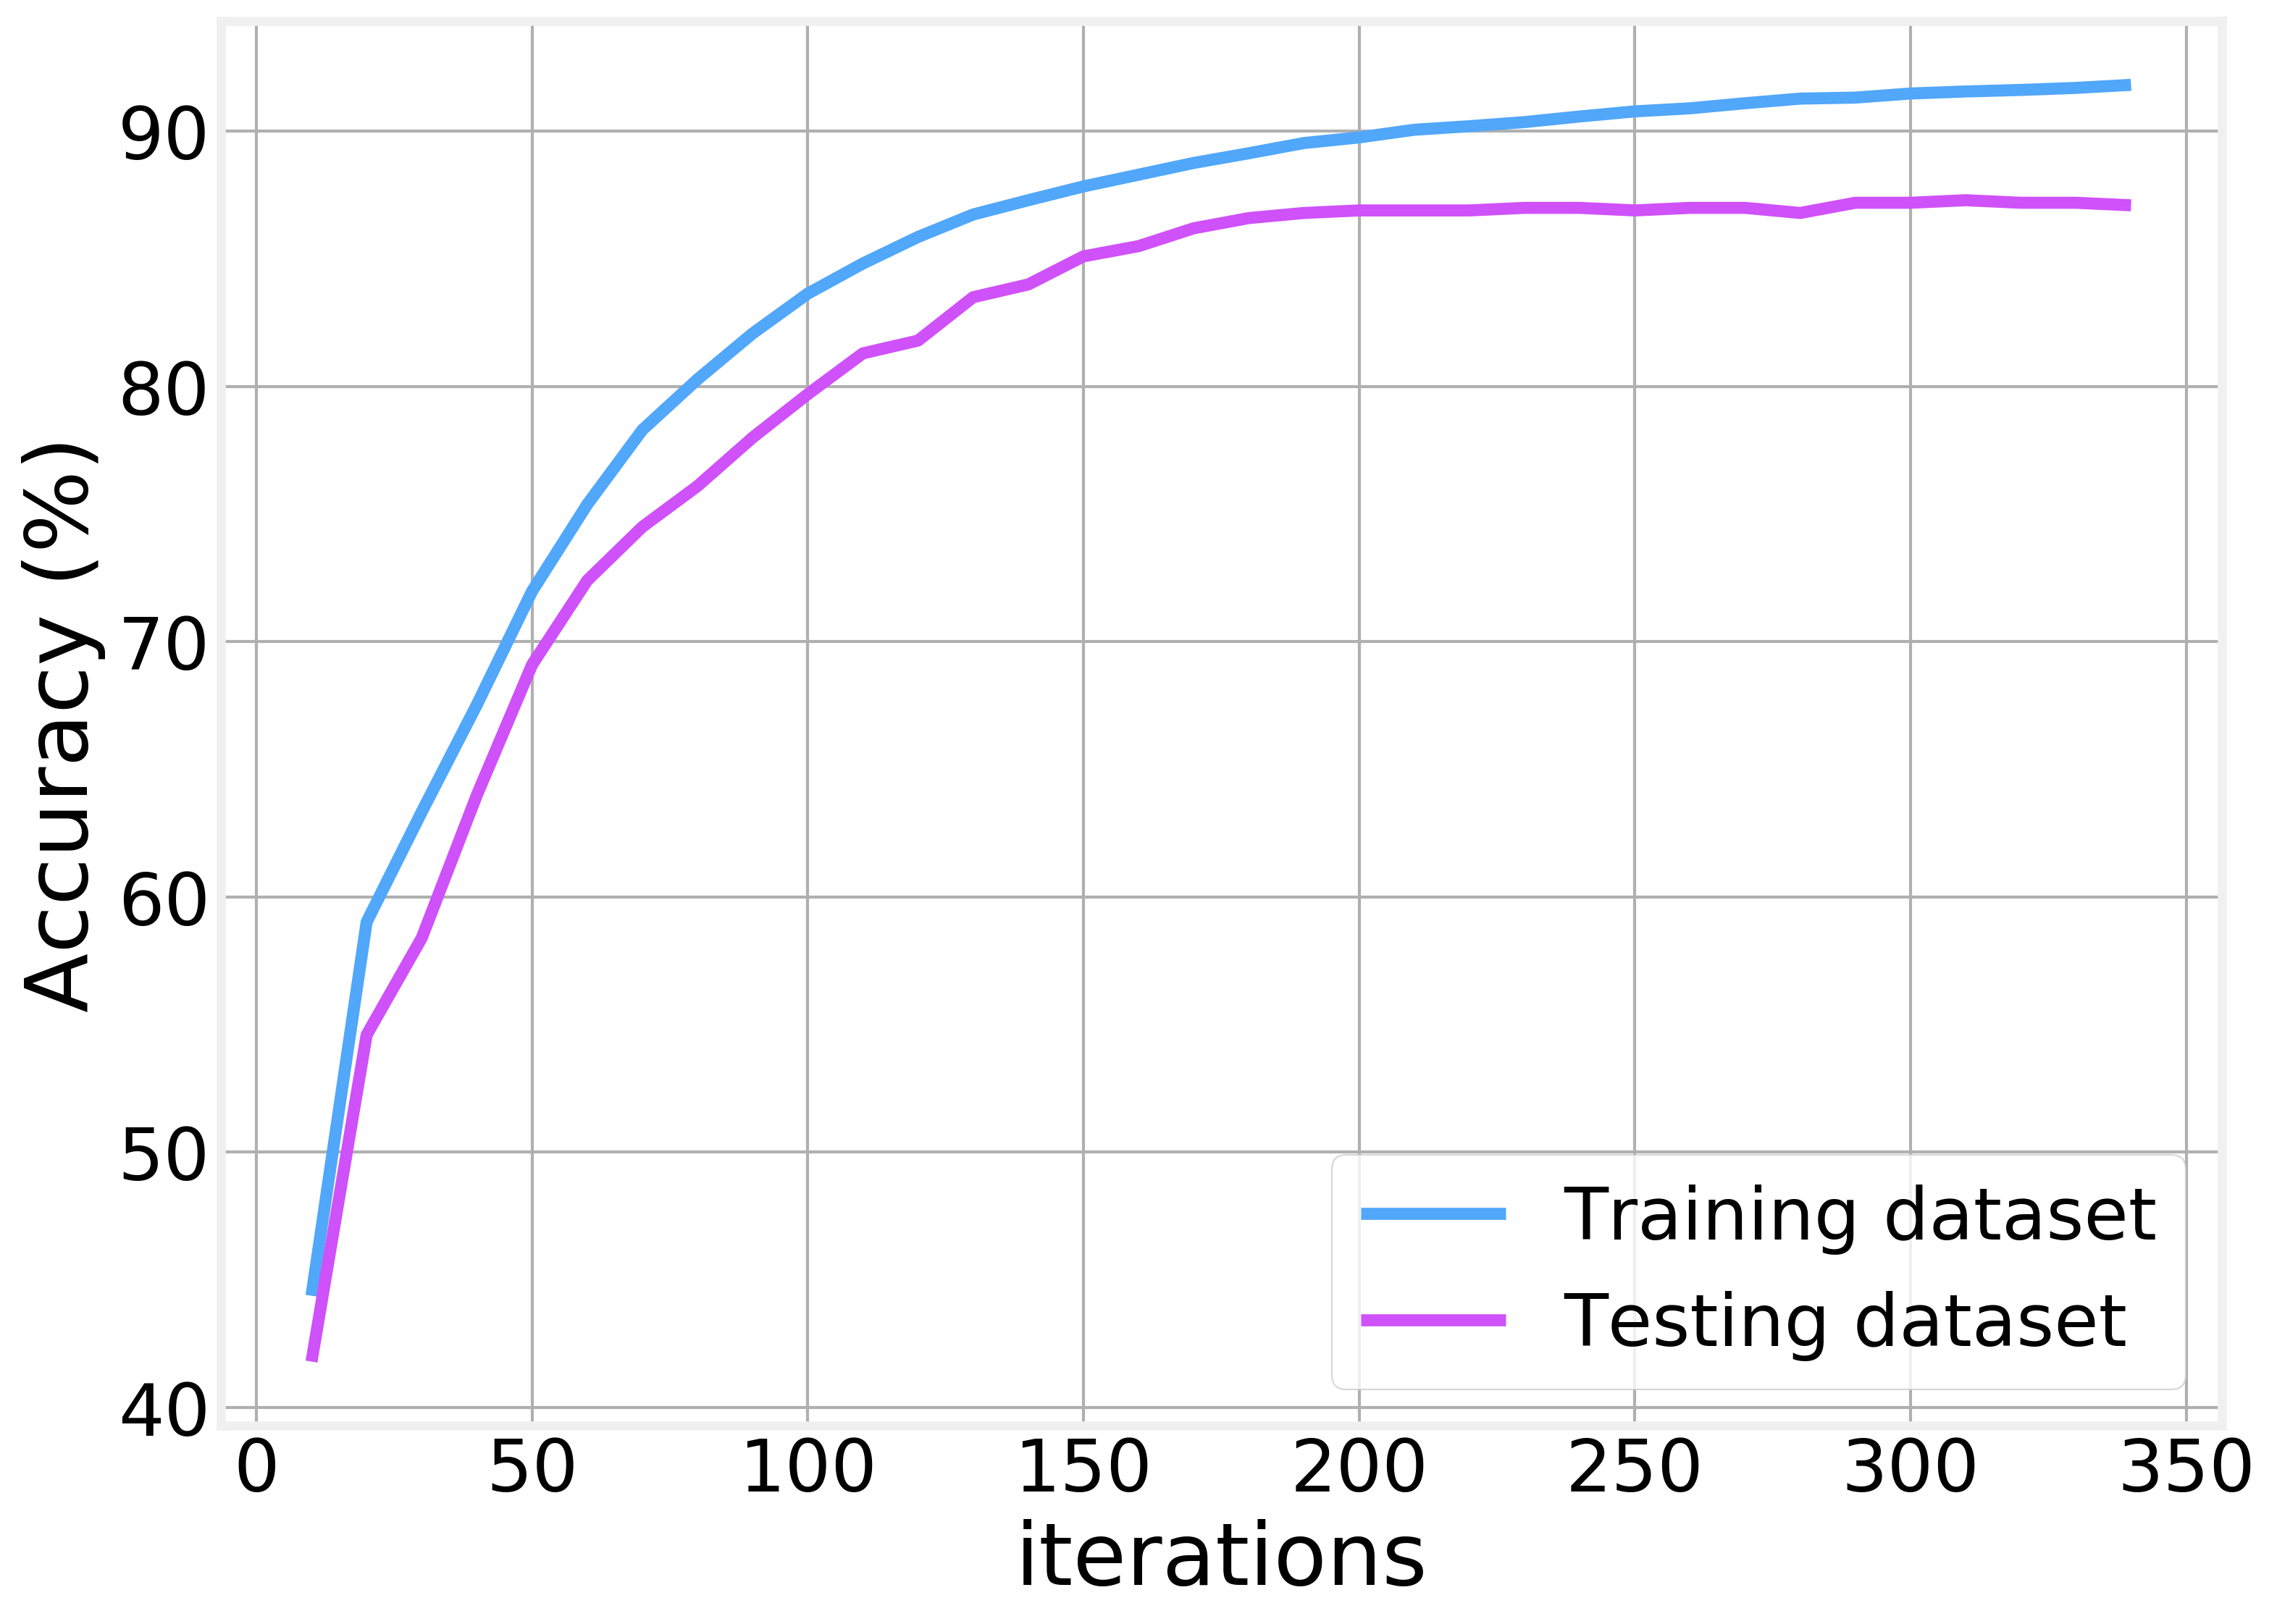

In [18]:
plt.plot(steps, acc_train, label='Training dataset')
plt.plot(steps, acc_test, label='Testing dataset')
plt.xlabel("iterations")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.gcf().set_size_inches(11, 8)

## Save the trained model

In [19]:
np.save('Theta1_short.npy', Theta1)
np.save('Theta2_short.npy', Theta2)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>